In [5]:
import pandas as pd
file_path = 'RankingView_12052023.csv'

# Attempting to load the data with a different encoding (commonly used: 'ISO-8859-1' or 'latin1')
try:
    data = pd.read_csv(file_path, encoding='ISO-8859-1')
    # Displaying the first few rows for an overview
    overview = data.head()
except Exception as e:
    overview = str(e)

overview



,Year,Rank,Country code,Country,Region Code,Region,Overall,Coverage,Openness
0,2022,1.0,SGP,Singapore,ASE,South-Eastern Asia,90.4,76.7,100.0
1,2022,2.0,POL,Poland,EUE,Eastern Europe,87.0,81.2,91.9
2,2022,3.0,DNK,Denmark,EUN,Northern Europe,86.7,76.5,95.4
3,2022,4.0,FIN,Finland,EUN,Northern Europe,85.8,81.8,89.3
4,2022,5.0,NOR,Norway,EUN,Northern Europe,85.2,77.5,91.7


In [17]:
# Calculate descriptive statistics for the numerical columns
descriptive_stats = data.describe()

# Checking if Slovakia is in the dataset
slovakia_data = data[data['Country'] == 'Slovakia']

# Preparing for comparative analysis - ensure calculations are done only on numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns
numeric_data = data[numeric_columns]

# Calculating regional and global averages on numeric data
regional_averages = numeric_data.groupby(data['Region']).mean()
global_averages = numeric_data.mean()
# Results
descriptive_stats, slovakia_data, regional_averages, global_averages



(         Year        Rank  Country code  Region Code     Overall    Coverage  \
 count   195.0  195.000000           0.0          0.0  195.000000  195.000000   
 mean   2022.0   97.866667           NaN          NaN   50.147179   47.179487   
 std       0.0   56.417010           NaN          NaN   17.949569   15.553095   
 min    2022.0    1.000000           NaN          NaN    1.300000    1.100000   
 25%    2022.0   49.500000           NaN          NaN   38.100000   38.250000   
 50%    2022.0   98.000000           NaN          NaN   48.400000   46.800000   
 75%    2022.0  146.500000           NaN          NaN   63.500000   58.550000   
 max    2022.0  195.000000           NaN          NaN   90.400000   81.800000   
 
          Openness  
 count  195.000000  
 mean    52.628718  
 std     21.317838  
 min      1.400000  
 25%     35.600000  
 50%     50.000000  
 75%     68.900000  
 max    100.000000  ,
       Year  Rank  Country code   Country  Region Code          Region  \
 17  

) missing from current font.l\Temp\ipykernel_15736\1277407427.py:17: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from current font.\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


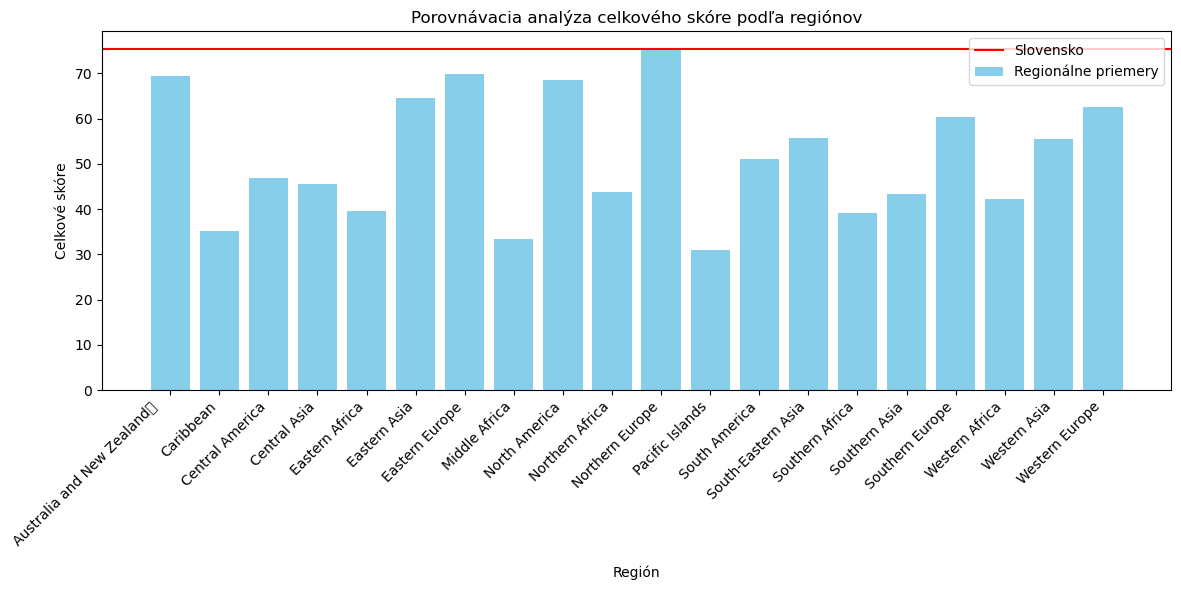

In [18]:
import matplotlib.pyplot as plt

# Data preparation for visualization
regions = regional_averages.index
overall_scores = regional_averages['Overall']
slovakia_overall = slovakia_data['Overall'].iloc[0]

# Visualization: Overall scores of regions with Slovakia's score highlighted
plt.figure(figsize=(12, 6))
plt.bar(regions, overall_scores, color='skyblue', label='Regionálne priemery')
plt.axhline(y=slovakia_overall, color='r', linestyle='-', label='Slovensko')
plt.xlabel('Región')
plt.ylabel('Celkové skóre')
plt.xticks(rotation=45, ha="right")
plt.title('Porovnávacia analýza celkového skóre podľa regiónov')
plt.legend()
plt.tight_layout()
plt.show()


In [19]:
# Loading the additional datasets
file_paths = [
    'RankingView_12052023.csv', 
    'RankingView_12052023 (1).csv',
    'RankingView_12052023 (2).csv',
    'RankingView_12052023 (3).csv',
    'RankingView_12052023 (4).csv'
]

# Attempting to load each dataset
datasets = []
for path in file_paths:
    try:
        datasets.append(pd.read_csv(path, encoding='ISO-8859-1'))
    except Exception as e:
        print(f"Error loading file {path}: {e}")

# Checking if datasets are loaded successfully
loaded_datasets = len(datasets)
loaded_datasets

5

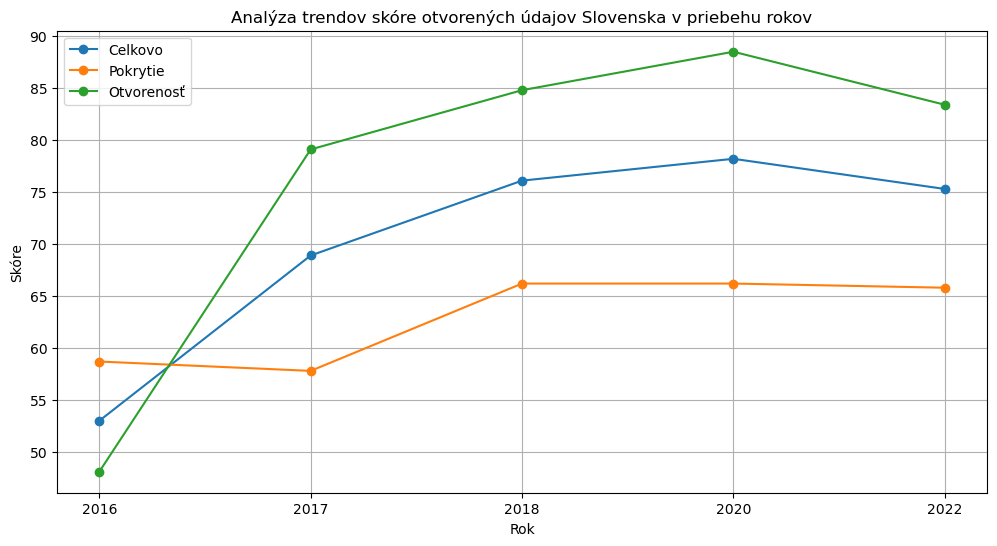

,Year,Overall,Coverage,Openness
43,2016,53.0,58.7,48.1
10,2017,68.9,57.8,79.1
11,2018,76.1,66.2,84.8
9,2020,78.2,66.2,88.5
17,2022,75.3,65.8,83.4


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'datasets' is a list of DataFrame objects already defined
slovakia_trends = pd.DataFrame()

for dataset in datasets:
    slovakia_yearly_data = dataset[dataset['Country'] == 'Slovakia']
    if not slovakia_yearly_data.empty:
        # Using pd.concat() instead of .append() for adding data frames
        slovakia_trends = pd.concat([slovakia_trends, slovakia_yearly_data])

# Sorting the data by year for proper chronological analysis
slovakia_trends = slovakia_trends.sort_values(by='Year')

# Preparing for the trend visualization
years = slovakia_trends['Year']
overall_scores = slovakia_trends['Overall']
coverage_scores = slovakia_trends['Coverage']
openness_scores = slovakia_trends['Openness']

# Visualization: Trend graph for Slovakia's scores over the years
plt.figure(figsize=(12, 6))
plt.plot(years, overall_scores, marker='o', label='Celkovo')
plt.plot(years, coverage_scores, marker='o', label='Pokrytie')
plt.plot(years, openness_scores, marker='o', label='Otvorenosť')
plt.xlabel('Rok')
plt.ylabel('Skóre')
plt.title('Analýza trendov skóre otvorených údajov Slovenska v priebehu rokov')
plt.legend()
plt.grid(True)
plt.show()

# Displaying the data used for the trend analysis
slovakia_trends[['Year', 'Overall', 'Coverage', 'Openness']]


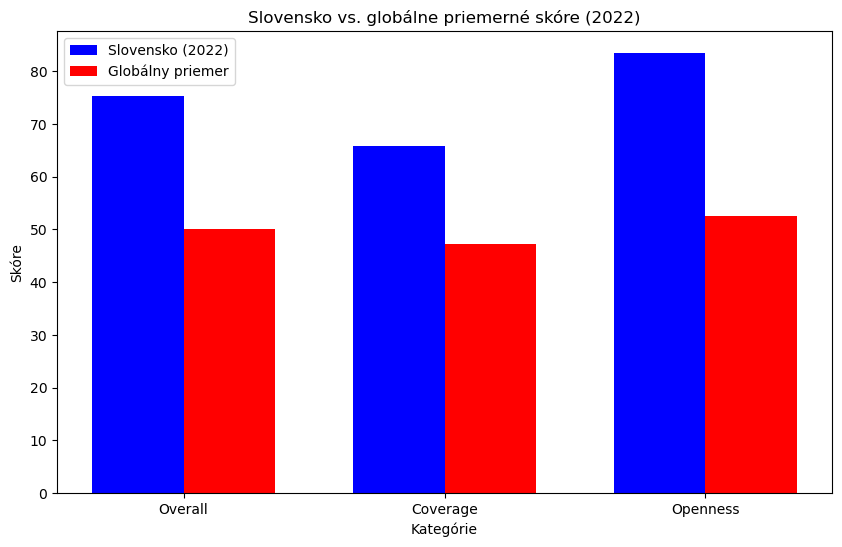

In [22]:
# Extracting global averages for comparison
global_averages = data.mean(numeric_only=True)

# Data for comparative visualization
slovakia_latest_year = slovakia_data['Year'].iloc[0]
slovakia_latest_scores = slovakia_data[['Overall', 'Coverage', 'Openness']].iloc[0]

# Visualization: Comparative bar graph
categories = ['Overall', 'Coverage', 'Openness']
slovakia_scores = [slovakia_latest_scores['Overall'], slovakia_latest_scores['Coverage'], slovakia_latest_scores['Openness']]
global_avg_scores = [global_averages['Overall'], global_averages['Coverage'], global_averages['Openness']]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(categories))

plt.bar(index, slovakia_scores, bar_width, label='Slovensko (2022)', color='b')
plt.bar([i + bar_width for i in index], global_avg_scores, bar_width, label='Globálny priemer', color='r')

plt.xlabel('Kategórie')
plt.ylabel('Skóre')
plt.title('Slovensko vs. globálne priemerné skóre (2022)')
plt.xticks([i + bar_width / 2 for i in index], categories)
plt.legend()
plt.show()


In [23]:
import numpy as np

# Function to extract top performing countries in a specific year for a given category
def get_top_countries(dataset, year, category, top_n=5):
    yearly_data = dataset[dataset['Year'] == year]
    top_countries = yearly_data.nlargest(top_n, category)
    return top_countries[['Country', category]]

# Consolidating all datasets for trend analysis of top countries
all_data = pd.concat(datasets)

# Selecting the most recent year from the datasets for comparison
most_recent_year = all_data['Year'].max()
top_overall_countries = get_top_countries(all_data, most_recent_year, 'Overall')
top_coverage_countries = get_top_countries(all_data, most_recent_year, 'Coverage')
top_openness_countries = get_top_countries(all_data, most_recent_year, 'Openness')

# Preparing data for trend visualization of top countries alongside Slovakia
def prepare_trend_data(country_name, category):
    country_data = all_data[all_data['Country'] == country_name]
    return country_data[['Year', category]].sort_values(by='Year')

# Slovakia's data for trend comparison
slovakia_trend_overall = prepare_trend_data('Slovakia', 'Overall')
slovakia_trend_coverage = prepare_trend_data('Slovakia', 'Coverage')
slovakia_trend_openness = prepare_trend_data('Slovakia', 'Openness')

# Top countries' trend data
top_countries_trend = {}
for country in np.concatenate([top_overall_countries['Country'], top_coverage_countries['Country'], top_openness_countries['Country']]):
    top_countries_trend[country] = {
        'Overall': prepare_trend_data(country, 'Overall'),
        'Coverage': prepare_trend_data(country, 'Coverage'),
        'Openness': prepare_trend_data(country, 'Openness')
    }

# Displaying top countries for each category for the most recent year
top_overall_countries, top_coverage_countries, top_openness_countries



(    Country  Overall
 195     NaN      NaN
 187     NaN      NaN
 178     NaN      NaN
 180     NaN      NaN
 173     NaN      NaN,
     Country  Coverage
 195     NaN       NaN
 187     NaN       NaN
 178     NaN       NaN
 180     NaN       NaN
 173     NaN       NaN,
     Country  Openness
 195     NaN       NaN
 187     NaN       NaN
 178     NaN       NaN
 180     NaN       NaN
 173     NaN       NaN)

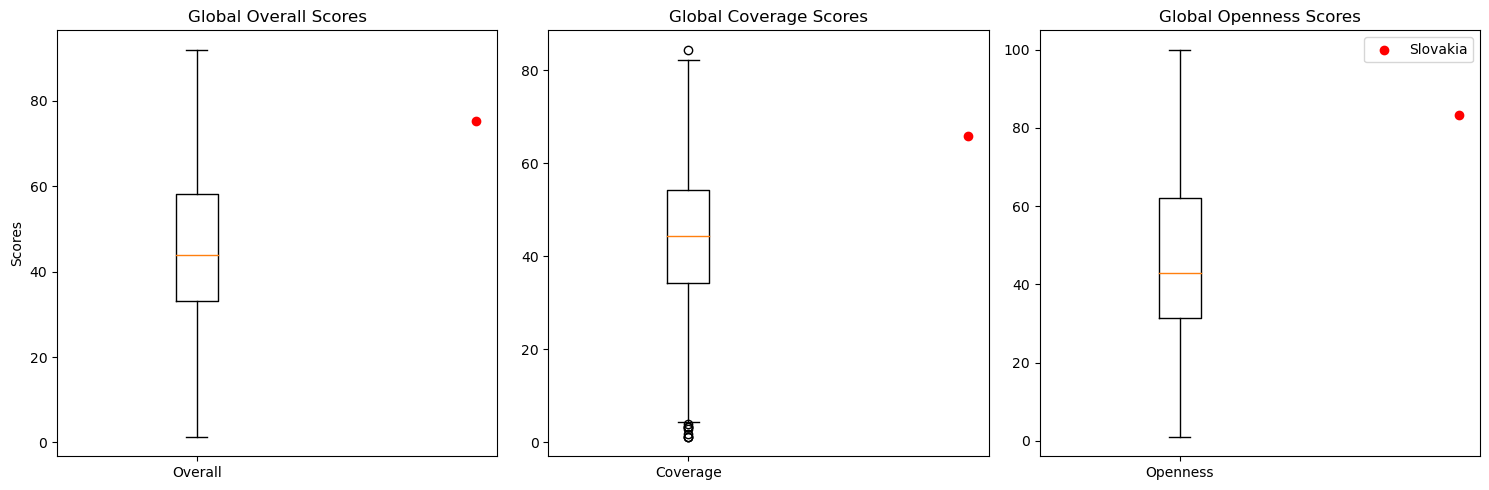

In [24]:
# Creating box plots for the global distribution of 'Overall', 'Coverage', and 'Openness' scores

# Preparing the data for box plots
overall_scores_global = all_data['Overall'].dropna()
coverage_scores_global = all_data['Coverage'].dropna()
openness_scores_global = all_data['Openness'].dropna()

# Slovakia's latest scores for comparison
slovakia_overall_latest = slovakia_data['Overall'].iloc[0]
slovakia_coverage_latest = slovakia_data['Coverage'].iloc[0]
slovakia_openness_latest = slovakia_data['Openness'].iloc[0]

# Box plot visualization
plt.figure(figsize=(15, 5))

# Overall Scores Box Plot
plt.subplot(1, 3, 1)
plt.boxplot(overall_scores_global)
plt.scatter(2, slovakia_overall_latest, color='red', label='Slovakia')
plt.title('Global Overall Scores')
plt.ylabel('Scores')
plt.xticks([1], ['Overall'])

# Coverage Scores Box Plot
plt.subplot(1, 3, 2)
plt.boxplot(coverage_scores_global)
plt.scatter(2, slovakia_coverage_latest, color='red', label='Slovakia')
plt.title('Global Coverage Scores')
plt.xticks([1], ['Coverage'])

# Openness Scores Box Plot
plt.subplot(1, 3, 3)
plt.boxplot(openness_scores_global)
plt.scatter(2, slovakia_openness_latest, color='red', label='Slovakia')
plt.title('Global Openness Scores')
plt.xticks([1], ['Openness'])

plt.tight_layout()
plt.legend()
plt.show()


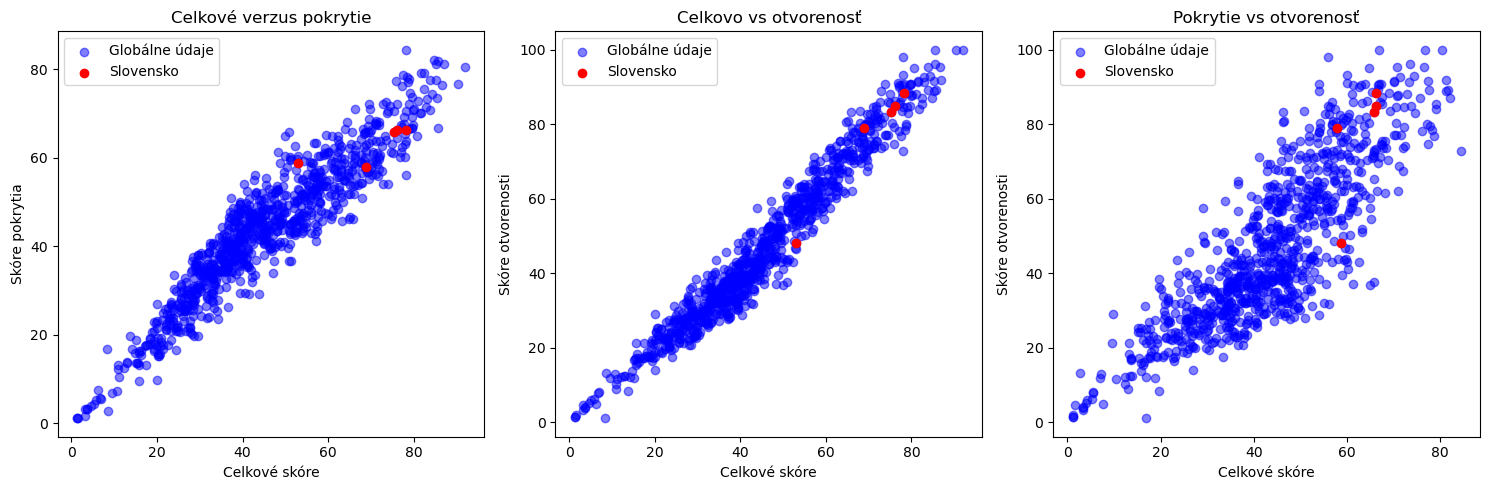

In [25]:
# Scatter Plot for Correlation Analysis
plt.figure(figsize=(15, 5))

# Overall vs Coverage
plt.subplot(1, 3, 1)
plt.scatter(all_data['Overall'], all_data['Coverage'], color='blue', alpha=0.5, label='Globálne údaje')
plt.scatter(slovakia_trends['Overall'], slovakia_trends['Coverage'], color='red', label='Slovensko')
plt.title('Celkové verzus pokrytie')
plt.xlabel('Celkové skóre')
plt.ylabel('Skóre pokrytia')
plt.legend()

# Overall vs Openness
plt.subplot(1, 3, 2)
plt.scatter(all_data['Overall'], all_data['Openness'], color='blue', alpha=0.5, label='Globálne údaje')
plt.scatter(slovakia_trends['Overall'], slovakia_trends['Openness'], color='red', label='Slovensko')
plt.title('Celkovo vs otvorenosť')
plt.xlabel('Celkové skóre')
plt.ylabel('Skóre otvorenosti')
plt.legend()

# Coverage vs Openness
plt.subplot(1, 3, 3)
plt.scatter(all_data['Coverage'], all_data['Openness'], color='blue', alpha=0.5, label='Globálne údaje')
plt.scatter(slovakia_trends['Coverage'], slovakia_trends['Openness'], color='red', label='Slovensko')
plt.title('Pokrytie vs otvorenosť')
plt.xlabel('Celkové skóre')
plt.ylabel('Skóre otvorenosti')
plt.legend()

plt.tight_layout()
plt.show()


In [26]:
# I will load the additional datasets to understand their structure and contents.
# This will help in determining the kind of analysis that can be done across all years, with a focus on Slovakia.

file_paths = [
    'RankingView_12052023 (1).csv',
    'RankingView_12052023 (2).csv',
    'RankingView_12052023 (3).csv',
    'RankingView_12052023 (4).csv',
    'RankingView_12052023.csv'
]

datasets = {}

# Attempt to load each dataset
for idx, file_path in enumerate(file_paths):
    try:
        datasets[idx] = pd.read_csv(file_path, encoding='ISO-8859-1')
    except Exception as e:
        datasets[idx] = f"Error loading file: {str(e)}"

# Checking if the datasets are loaded successfully or not
datasets_loaded = all(isinstance(datasets[idx], pd.DataFrame) for idx in datasets)

# Displaying the first few rows of each dataset if successfully loaded
if datasets_loaded:
    dataset_heads = {idx: datasets[idx].head() for idx in datasets}
else:
    dataset_heads = None

datasets_loaded, dataset_heads if datasets_loaded else None


(True,
 {0:    Year  Rank Country code    Country Region Code              Region  \
  0  2020   1.0          SGP  Singapore         ASE  South-Eastern Asia   
  1  2020   2.0          POL     Poland         EUE      Eastern Europe   
  2  2020   3.0          FIN    Finland         EUN     Northern Europe   
  3  2020   4.0          DNK    Denmark         EUN     Northern Europe   
  4  2020   5.0          SWE     Sweden         EUN     Northern Europe   
  
     Overall  Coverage  Openness  
  0     92.0      80.4     100.0  
  1     85.3      81.2      88.8  
  2     84.8      82.1      87.1  
  3     84.4      74.4      93.0  
  4     83.9      77.6      89.3  ,
  1:    Year  Rank Country code      Country Region Code              Region  \
  0  2018   1.0          SGP    Singapore         ASE  South-Eastern Asia   
  1  2018   2.0          DNK      Denmark         EUN     Northern Europe   
  2  2018   3.0          NLD  Netherlands         EUW      Western Europe   
  3  2018   4.0

C:\Users\Zsolti\AppData\Local\Temp\ipykernel_15736\2089790645.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[col] = pd.to_numeric(filtered_data[col], errors='coerce')


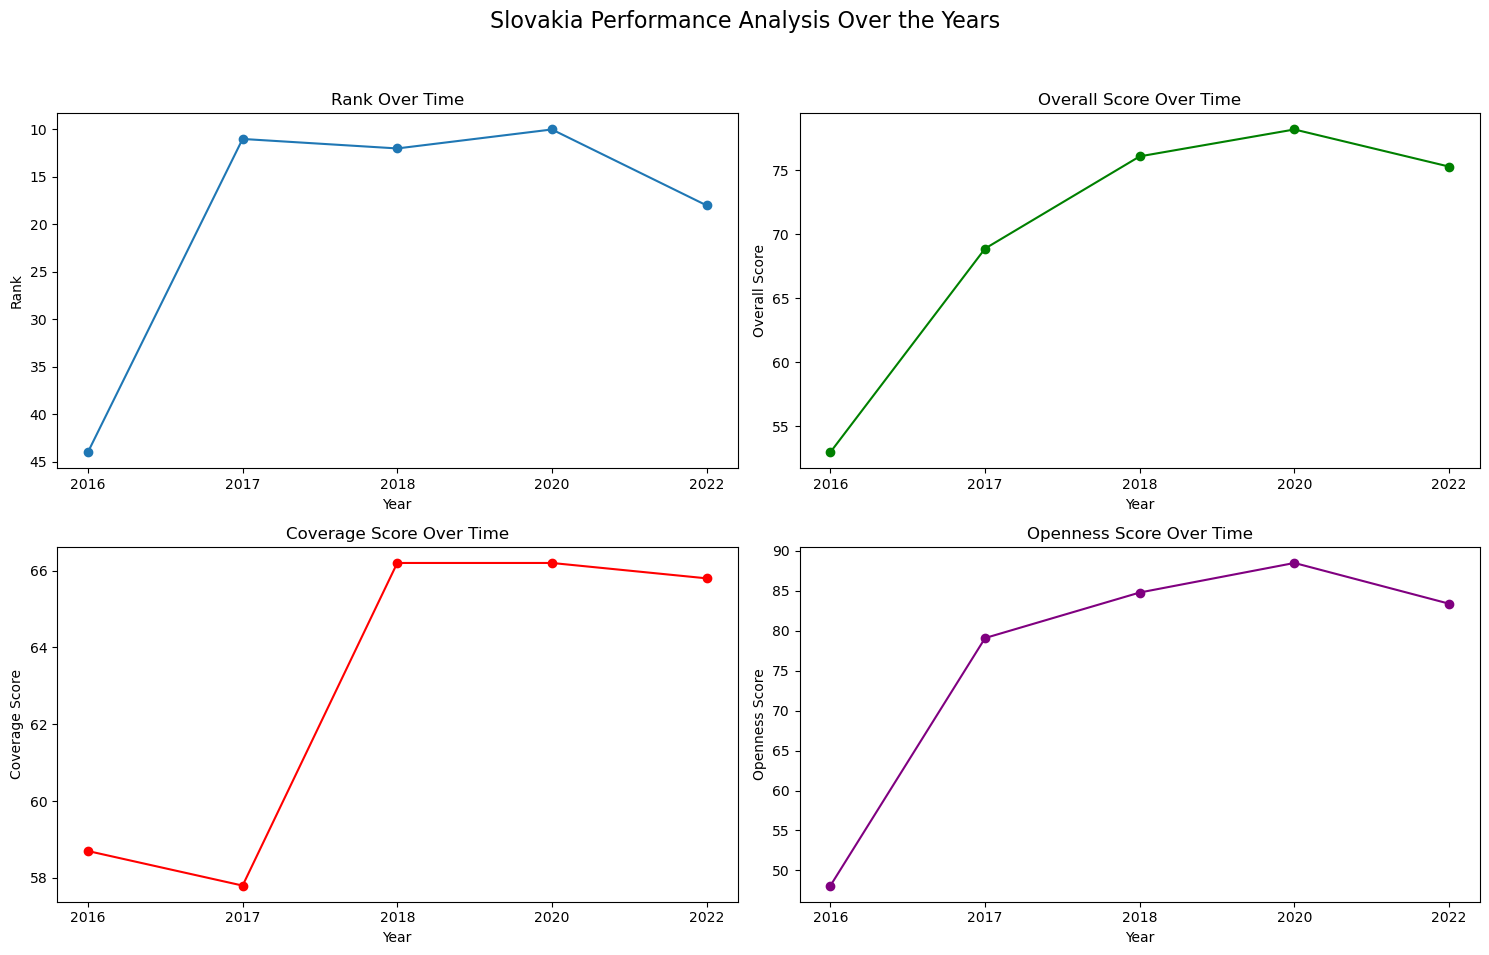

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'datasets' is a dictionary of DataFrames with year as keys
slovakia_data = pd.DataFrame()

for year_data in datasets.values():
    # Extract only Slovakia's data and ensure all numerical columns are treated as such
    filtered_data = year_data[year_data['Country'] == 'Slovakia']
    for col in ['Rank', 'Overall', 'Coverage', 'Openness']:  # Making sure these columns are numeric
        filtered_data[col] = pd.to_numeric(filtered_data[col], errors='coerce')
    slovakia_data = pd.concat([slovakia_data, filtered_data], ignore_index=True)

# Sorting the data by Year
slovakia_data.sort_values(by='Year', inplace=True)

# Plotting the time series for Rank, Overall, Coverage, and Openness scores
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Slovakia Performance Analysis Over the Years', fontsize=16)

# Rank over the years
axes[0, 0].plot(slovakia_data['Year'], slovakia_data['Rank'], marker='o')
axes[0, 0].set_title('Rank Over Time')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Rank')
axes[0, 0].invert_yaxis()  # Lower ranks are better, so invert this axis

# Overall score over the years
axes[0, 1].plot(slovakia_data['Year'], slovakia_data['Overall'], marker='o', color='green')
axes[0, 1].set_title('Overall Score Over Time')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Overall Score')

# Coverage score over the years
axes[1, 0].plot(slovakia_data['Year'], slovakia_data['Coverage'], marker='o', color='red')
axes[1, 0].set_title('Coverage Score Over Time')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Coverage Score')

# Openness score over the years
axes[1, 1].plot(slovakia_data['Year'], slovakia_data['Openness'], marker='o', color='purple')
axes[1, 1].set_title('Openness Score Over Time')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Openness Score')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Calculating year-on-year changes for Rank, Overall, Coverage, and Openness
year_on_year_changes = slovakia_data.set_index('Year').diff().rename(columns=lambda x: x + ' Change')
print(year_on_year_changes)


In [29]:
# Excluding non-numeric columns before calculating year-on-year changes
numeric_columns = ['Rank', 'Overall', 'Coverage', 'Openness']
slovakia_numeric_data = slovakia_data.set_index('Year')[numeric_columns]

# Calculating year-on-year changes for Rank, Overall, Coverage, and Openness
year_on_year_changes = slovakia_numeric_data.diff().rename(columns=lambda x: x + ' Change')

year_on_year_changes.reset_index(inplace=True)
year_on_year_changes


,Year,Rank Change,Overall Change,Coverage Change,Openness Change
0,2016,NaN,NaN,NaN,NaN
1,2017,-33.0,15.9,-0.9,31.0
2,2018,1.0,7.2,8.4,5.7
3,2020,-2.0,2.1,0.0,3.7
4,2022,8.0,-2.9,-0.4,-5.1


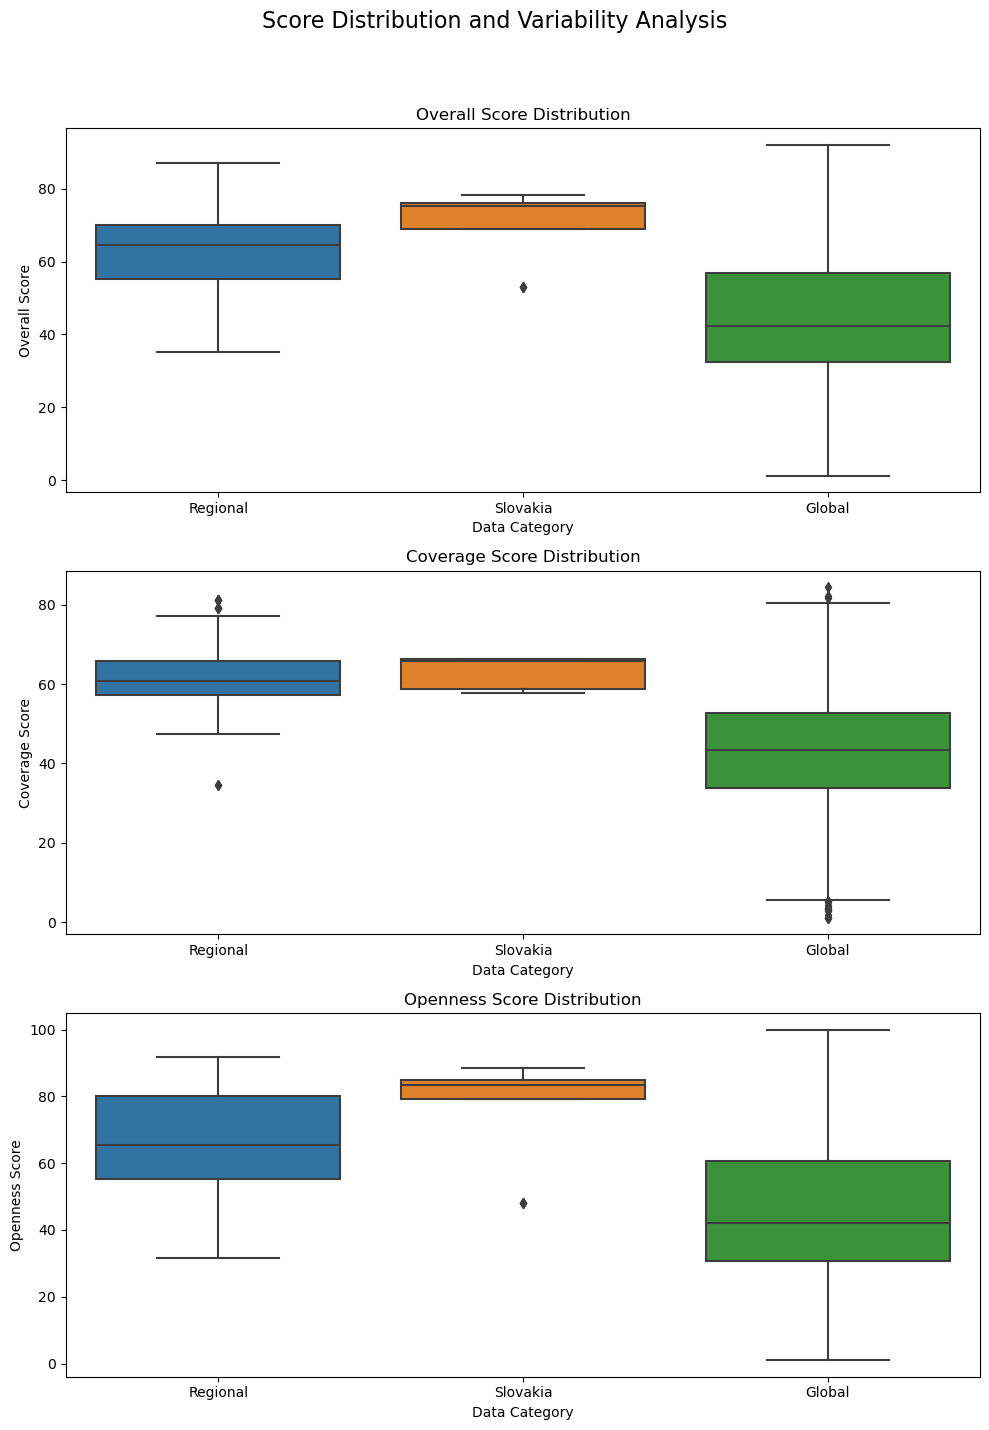

In [30]:
# Data Distribution and Variability Analysis
import seaborn as sns

# Preparing data for box plots
box_plot_data = pd.DataFrame()

for year_data in datasets.values():
    regional_data = year_data[year_data['Region Code'] == 'EUE']  # Eastern Europe data
    global_data = year_data  # All data

    # Appending data for box plots
    box_plot_data = pd.concat([box_plot_data, regional_data, global_data, slovakia_data[slovakia_data['Year'] == year_data['Year'].iloc[0]]])

# Adding a column to distinguish between Slovakia, Regional, and Global data
box_plot_data['Data Category'] = box_plot_data.apply(lambda row: 'Slovakia' if row['Country'] == 'Slovakia' else ('Regional' if row['Region Code'] == 'EUE' else 'Global'), axis=1)

# Plotting box plots for score distribution
fig, axes = plt.subplots(nrows=3, figsize=(10, 15))
fig.suptitle('Score Distribution and Variability Analysis', fontsize=16)

# Plotting for Overall, Coverage, and Openness scores
for i, score_type in enumerate(['Overall', 'Coverage', 'Openness']):
    sns.boxplot(x='Data Category', y=score_type, data=box_plot_data, ax=axes[i])
    axes[i].set_title(score_type + ' Score Distribution')
    axes[i].set_xlabel('Data Category')
    axes[i].set_ylabel(score_type + ' Score')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
